#### 1.3 Exploratory Data Analysis (EDA):
by Hannah Clausi and Vian Ambar Agustono

**A. Import all libraries here necessary for EDA:**

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import time 

sns.set(style="whitegrid")


**B. ETL (Extract, Transform, and Load data)**

First, ETL will be performed on the dataset of `Greenhouse Gases by Sector and State`. Data exists in the `Main` sheet and the `Sectors` sheet, therefore `Main` data will be extracted first: 

In [55]:
current_directory = os.getcwd()
ghg_filename = "GHGs_by_Sector_and_State_2012-2022.xlsx"

ghg_main_df = pd.read_excel(
    os.path.join(current_directory, "datasets", ghg_filename),
    sheet_name = 'Main'
)

ghg_main_df.head()


,Flowable,Sector,State,Year,FlowAmount
0,Carbon dioxide,111,AK,2012,8.349448e+07
1,Carbon dioxide,111,AK,2013,1.259086e+08
2,Carbon dioxide,111,AK,2014,1.030956e+08
3,Carbon dioxide,111,AK,2015,9.149795e+07
4,Carbon dioxide,111,AK,2016,8.142637e+07


Now that `Main` data is confirmed to be extracted, `Sectors` data will be extracted next:

In [56]:
ghg_sectors_df = pd.read_excel(
    os.path.join(current_directory, "datasets", ghg_filename),
    sheet_name = 'Sectors'
)

ghg_sectors_df.head()

,Sector,SectorName
0,111,Crop Production
1,112,Animal Production and Aquaculture
2,113,Forestry and Logging
3,114,"Fishing, Hunting and Trapping"
4,115,Support Activities for Agriculture and Forestry


Now that `Sectors` data is extracted, both datasets can be combined based on the `Sector` column which is the primary key of the `Sectors` sheet and foreign key of the `Main` sheet:

In [57]:
ghg_df = ghg_main_df.merge(
    ghg_sectors_df, 
    on='Sector',
    how='left'
)

ghg_df.head()

,Flowable,Sector,State,Year,FlowAmount,SectorName
0,Carbon dioxide,111,AK,2012,8.349448e+07,Crop Production
1,Carbon dioxide,111,AK,2013,1.259086e+08,Crop Production
2,Carbon dioxide,111,AK,2014,1.030956e+08,Crop Production
3,Carbon dioxide,111,AK,2015,9.149795e+07,Crop Production
4,Carbon dioxide,111,AK,2016,8.142637e+07,Crop Production


From above, all variables are loaded properly with correct headers. Now, values in each column will be checked on whether they are non-null values and that they align with the expected header variable type:
- Flowable (nominal categorical): type of greenhouse gas
- Sector (nominal categorical, foreign key to sector table): NAICs industry code (though each code is represented by an integer value, each code represents a category)
- State (nominal categorical): two-letter U.S. state abbreviation
- Year (interval numerical): year 
- FlowAmount (ratio numerical): greenhouse gas emissions in kg 

In [58]:
ghg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503962 entries, 0 to 503961
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Flowable    503962 non-null  object 
 1   Sector      503962 non-null  object 
 2   State       503962 non-null  object 
 3   Year        503962 non-null  int64  
 4   FlowAmount  503962 non-null  float64
 5   SectorName  503962 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.1+ MB


From above, all values in all columns have the proper variable type and are non-null values. The `Greenhouse Gases` dataset has been loaded properly into a pandas DataFrame with appropriate headers, and the data types are consistent with expectations for each variable. 

Next, ETL will be performed on the dataset of `Chronic Disease Indicators in the US`, in which the data will be extracted:

In [59]:
current_directory = os.getcwd()
cdi_filename = "U.S._Chronic_Disease_Indicators_20250615.csv" 

cdi_df = pd.read_csv(os.path.join(current_directory, "datasets", cdi_filename))

cdi_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Age-adjusted Mean,...,HEA,HEA04,NaN,AGEADJMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXM,NaN,NaN,NaN,NaN
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",NaN,Number,Number,...,CAN,CAN03,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",NaN,Number,Number,...,CAN,CAN05,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN


From above, while the data was successfully extracted for `Chronic Disease Indicators`, there are plenty of columns with empty values that may not be necessary for analysis of the effect of greenhouse emissions on prevalence of chronic disease per state. Therefore, all columns will be eliminated except for the necessary ones stated below:
- YearStart/YearEnd (numerical)
- LocationAbbr (categorical): state abbreviation
- Topic (categorical): 115 defined chronic disease indicators
- Question (categorical): provides more details on the topic i.e. type of cancer
- DataValueUnit (categorical): number, per 100,000, etc.
- DataValueType (categorical): rate, number, etc.
- DataValue (numerical): actual metric being measured for the question
- DataValueFootnote (categorical): explanation of actual metric being measured
- StratificationCategory1 (categorical): specified demographic stratification category
- Stratification1 (categorical): specified demographic stratification group within category

In [60]:
keep_columns = [
    "YearStart",
    "YearEnd",
    "LocationAbbr",
    "Topic",
    "Question",
    "DataValueUnit",
    "DataValueType",
    "DataValue",
    "DataValueFootnote",
    "StratificationCategory1",
    "Stratification1"
]    

cdi_df = cdi_df[keep_columns]

cdi_df.head()

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnote,StratificationCategory1,Stratification1
0,2020,2020,US,Health Status,Recent activity limitation among adults,Number,Age-adjusted Mean,2.9,NaN,Sex,Female
1,2015,2019,AR,Cancer,"Invasive cancer (all sites combined), incidence",Number,Number,9537.0,NaN,Sex,Male
2,2015,2019,CA,Cancer,"Cervical cancer mortality among all females, u...",Number,Number,486.0,NaN,Overall,Overall
3,2015,2019,CO,Cancer,"Invasive cancer (all sites combined), incidence",Number,Number,2880.0,NaN,Race/Ethnicity,Hispanic
4,2015,2019,GA,Cancer,"Prostate cancer mortality among all males, und...",Number,Number,519.0,NaN,Race/Ethnicity,"White, non-Hispanic"


Now that all columns have been removed except the necessary ones and all headers are correct, values in each column will be checked on whether they are non-null values and that they align with the expected header variable type:

In [61]:
cdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                309215 non-null  int64  
 1   YearEnd                  309215 non-null  int64  
 2   LocationAbbr             309215 non-null  object 
 3   Topic                    309215 non-null  object 
 4   Question                 309215 non-null  object 
 5   DataValueUnit            309215 non-null  object 
 6   DataValueType            309215 non-null  object 
 7   DataValue                209196 non-null  float64
 8   DataValueFootnote        101716 non-null  object 
 9   StratificationCategory1  309215 non-null  object 
 10  Stratification1          309215 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 26.0+ MB


It appears that for the DataValue column, $309215 - 209196 = 100019$ values are missing. Based on https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators/hksd-2xuw/about_data, `DataValueFootnote` may be able to explain missing values in the DataValue column: 

In [65]:
cdi_df[cdi_df["DataValue"].isnull()].DataValueFootnote.value_counts()

DataValueFootnote
Data suppressed; denominator < 50 or relative standard error > 30%                                52652
Data suppressed; too few respondents or cases                                                     28763
No data available                                                                                 12734
No data available for this indicator because the module was not used by the state or territory     5738
The state registry opted not to present state-specific estimates for this race/ethnicity group       84
Data cannot be calculated                                                                            48
Name: count, dtype: int64

It appears `DataValue` is null at times due to data suppression, too small of a sample size, or missing modules. Therefore rows where `DataValue` is null must be dropped:

In [67]:
cdi_df = cdi_df.dropna(subset=["DataValue"])

cdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209196 entries, 0 to 309214
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                209196 non-null  int64  
 1   YearEnd                  209196 non-null  int64  
 2   LocationAbbr             209196 non-null  object 
 3   Topic                    209196 non-null  object 
 4   Question                 209196 non-null  object 
 5   DataValueUnit            209196 non-null  object 
 6   DataValueType            209196 non-null  object 
 7   DataValue                209196 non-null  float64
 8   DataValueFootnote        1697 non-null    object 
 9   StratificationCategory1  209196 non-null  object 
 10  Stratification1          209196 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 19.2+ MB


While all rows with NULL `DataValue` values were eliminated, some `DataValueFootnote` values exist which can be explored further:

In [69]:
cdi_df.DataValueFootnote.value_counts()

DataValueFootnote
Interpret with caution: 95% confidence interval width is greater than 20 percentage points or 1.2 times the estimate    937
Interpret with caution; less than 60 respondents                                                                        535
Estimate is 0.0% because no cases were reported with this condition                                                     126
No data available                                                                                                        99
Name: count, dtype: int64

The `DataValueFootnote` messages above do not indicate missing values, but instead values with caveats - values with high uncertainty, small sample size, or valid estimates with no observed cases. Therefore, such records should not be dropped but instead be kept and analyzed with precaution. \

To prepare for comparing the `Greenhouse Gases` with the `Chronic Disease Indicators` dataset, the datasets could respectively merge as needed on the `State` and `LocationAbbr` columns as well as the `Year` and the `YearStart`/`YearEnd` columns. Before doing so, rows of `Chronic Disease Indicators` could be split into individual years:

In [72]:
cdi_df["Year"] = cdi_df.apply(
    lambda row: list(range(row["YearStart"], row["YearEnd"] + 1)),
    axis=1
)

cdi_df = cdi_df.explode("Year")

cdi_df.head()

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnote,StratificationCategory1,Stratification1,Year
0,2020,2020,US,Health Status,Recent activity limitation among adults,Number,Age-adjusted Mean,2.9,NaN,Sex,Female,2020
1,2015,2019,AR,Cancer,"Invasive cancer (all sites combined), incidence",Number,Number,9537.0,NaN,Sex,Male,2015
1,2015,2019,AR,Cancer,"Invasive cancer (all sites combined), incidence",Number,Number,9537.0,NaN,Sex,Male,2016
1,2015,2019,AR,Cancer,"Invasive cancer (all sites combined), incidence",Number,Number,9537.0,NaN,Sex,Male,2017
1,2015,2019,AR,Cancer,"Invasive cancer (all sites combined), incidence",Number,Number,9537.0,NaN,Sex,Male,2018


In [73]:
cdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272857 entries, 0 to 309214
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                272857 non-null  int64  
 1   YearEnd                  272857 non-null  int64  
 2   LocationAbbr             272857 non-null  object 
 3   Topic                    272857 non-null  object 
 4   Question                 272857 non-null  object 
 5   DataValueUnit            272857 non-null  object 
 6   DataValueType            272857 non-null  object 
 7   DataValue                272857 non-null  float64
 8   DataValueFootnote        2634 non-null    object 
 9   StratificationCategory1  272857 non-null  object 
 10  Stratification1          272857 non-null  object 
 11  Year                     272857 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 27.1+ MB


After expanding each `Chronic Disease Indicators` record above as necessary to represent individual years between `YearStart` and `YearEnd`, exploratory data analysis could be initiated on both `Greenhouse Gas Emissions` and `Chronic Disease Indicators`. 

**C. Exploratory Data Analysis of Variables**

To begin EDA (Exploratory Data Analysis), each variable of the `Greenhouse Gas Emissions` dataset could be investigated individually and in combination with each other:

**FlowAmount:**

`FlowAmount` is a ratio numerical variable representing the amount of greenhouse gas emissions in kg (mass-based units). Summary statistics of `FlowAmount` could be calculated with the `describe()` function:

In [81]:
ghg_df.FlowAmount.describe()

count    5.039620e+05
mean     1.153742e+08
std      2.014930e+09
min      4.816310e-05
25%      1.618042e+01
50%      3.393353e+02
75%      5.910831e+04
max      1.914298e+11
Name: FlowAmount, dtype: float64

The `FlowAmount` variable is right-skewed with a median of 339 kg but a mean of 115,000,000 kg - meaning that there are a few extremely large emissions values in some records influencing the average. Most records report lower emissions than the mean since 75% of emissions records have `FlowAmount` below 59,000 kg. Proportions can be represented in a log-scaled histogram to account for the wide range of `FlowAmount` quantities in records:

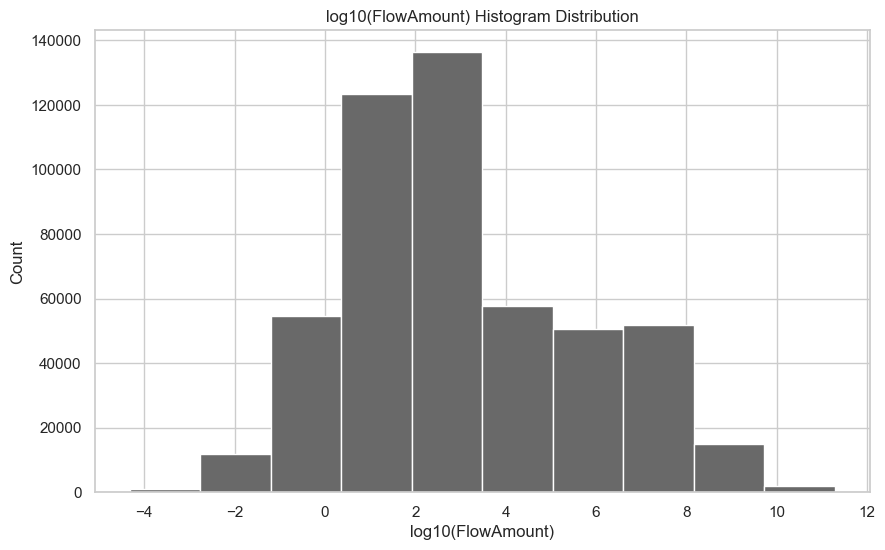

In [83]:
log_flow = np.log10(ghg_df['FlowAmount'][ghg_df['FlowAmount'] > 0])

figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist( log_flow, color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "log10(FlowAmount)")
axes.set_title("log10(FlowAmount) Histogram Distribution")
plt.show()
plt.close()


The log-scaled histogram above shows that most `FlowAmount` values fall between 1 to 10,000 kg ($10^{0}$ kg to $10^{4}$ kg), while the long right tail proves a right-skewed distribution caused by the presence of records with extremely high emissions values. 

Analysis of `FlowAmount` over time could be performed by aggregating total `FlowAmount` emissions per year and plotting the data in a line graph:

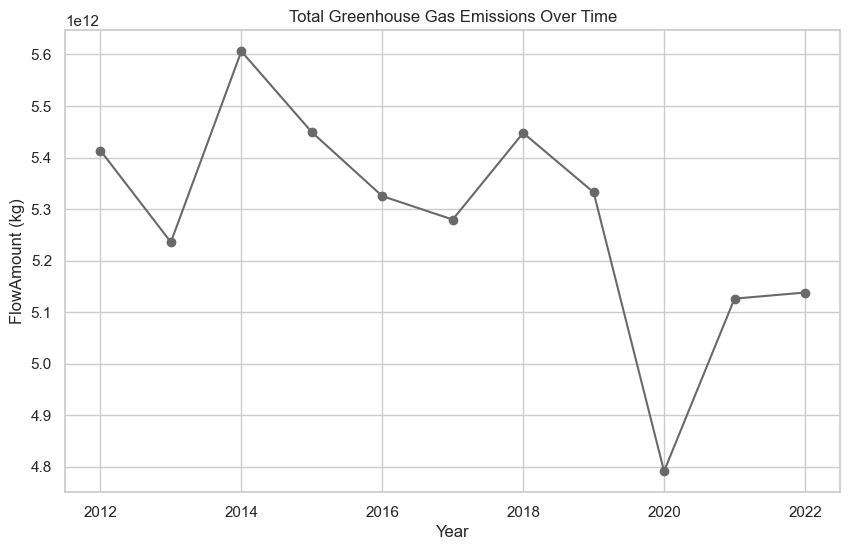

In [85]:
total_per_year = ghg_df.groupby("Year")["FlowAmount"].sum()

figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.plot( total_per_year.index, total_per_year.values, color="DimGray", marker='o')
axes.set_ylabel( "FlowAmount (kg)")
axes.set_xlabel( "Year")
axes.set_title("Total Greenhouse Gas Emissions Over Time")
plt.show()
plt.close()


From the line graph above, the total United States greenhouse gas emissions fluctuated around 5.5 trillion kg from 2012-2019. A sharp decline in emissions occurred in 2020 at 4.8 trillion kg (likely due to reduced industrial activity during the height of the COVID-19 pandemic). Emissions partially increased in 2021 and 2022 to around 5.1-5.2 trillion kg.  

**Flowable:**

`Flowable` is a categorical variable representing material that moves through or is released by a process (in this context, pollutant, emission, or waste product release through an industrial process). Proportions of `Flowable` records can be viewed through the `value_counts()` function:

In [75]:
ghg_df.Flowable.value_counts(normalize=True)

Flowable
Carbon dioxide                0.131290
Nitrous oxide                 0.118412
Methane                       0.118324
HFCs and PFCs, unspecified    0.103526
HFC-125                       0.103526
HFC-134a                      0.103526
HFC-143a                      0.103526
HFC-32                        0.103526
HFC-236fa                     0.103526
Sulfur hexafluoride           0.002895
Hexafluoroethane              0.002137
Carbon tetrafluoride          0.001746
Perfluoropropane              0.001492
Perfluorocyclobutane          0.001208
HFC-23                        0.000766
Nitrogen trifluoride          0.000560
Perfluorobutane               0.000008
Perfluorohexane               0.000008
Name: proportion, dtype: float64

From above, Carbon dioxide accounts for the largest proportion of emissions records at 13.1% each, while nitrous oxide and methane make up 11.8% each and HFCs and PFCs, HFC-125, HFC-134a, HFC-143a, HFC-32, and HFC-236fa make up 10.4% each. Less common gases like Sulfur hexafluoride, hexafluoroethane, and perfluoropropane make up less than 0.01% each of proportion of `Flowable` records.

In [78]:
ghg_df.groupby('Flowable')['FlowAmount'].describe().sort_values(by='mean', ascending=False).applymap(lambda x: f"{x:,.2f}")

C:\Users\viana\AppData\Local\Temp\ipykernel_7084\1953578857.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ghg_df.groupby('Flowable')['FlowAmount'].describe().sort_values(by='mean', ascending=False).applymap(lambda x: f"{x:,.2f}")


,count,mean,std,min,25%,50%,75%,max
Flowable,,,,,,,,
Carbon dioxide,"66,165.00","862,677,701.86","5,502,063,477.57",188.62,"3,469,386.87","19,225,231.59","124,918,437.43","191,429,843,506.86"
"HFCs and PFCs, unspecified","52,173.00","14,460,494.38","90,111,845.69",492.06,"152,641.56","1,152,248.30","5,948,574.88","3,900,063,028.66"
Methane,"59,631.00","4,915,898.87","44,944,207.19",0.01,297.90,"1,743.71","18,973.20","2,322,114,352.11"
Nitrous oxide,"59,675.00","287,418.89","2,799,868.81",0.00,16.04,108.30,"3,358.21","96,503,992.34"
HFC-23,386.00,"10,934.65","51,035.56",0.01,27.29,708.57,"2,222.00","410,325.24"
Carbon tetrafluoride,880.00,"6,466.21","16,659.04",0.06,1.34,11.50,"4,496.31","116,164.29"
Perfluorobutane,4.00,"5,625.63","10,462.89",240.59,410.95,471.40,"5,686.09","21,319.11"
Perfluorohexane,4.00,"5,089.78","9,466.39",217.54,371.72,426.50,"5,144.56","19,288.60"
HFC-134a,"52,173.00","4,245.79","26,747.22",0.14,39.37,310.85,"1,736.00","1,375,590.54"


From above, the top `Flowable` emitter per record is Carbon dioxide with a mean of 863,000,000 kg. HFCs and PFCs, unspecified follow with a much lower mean of 14,000,000 kg (though it should be considered that HFCs and PFCs are an umbrella group of multiple unspecified gases which could contribute to its inflated average amount). Methane and nitrous oxide follow in emissions amount but are significantly lower in average magnitude, while other gases have very low averages and tighter interquartile ranges suggesting limited release amounts. Overall, the distribution of `Flowamount` across `Flowable` gases is heavily skewed with a few gases dominating in mass.

The shape of the distributions of `FlowAmount` per record based on the `Flowable` category could be observed and analyzed through boxplot:

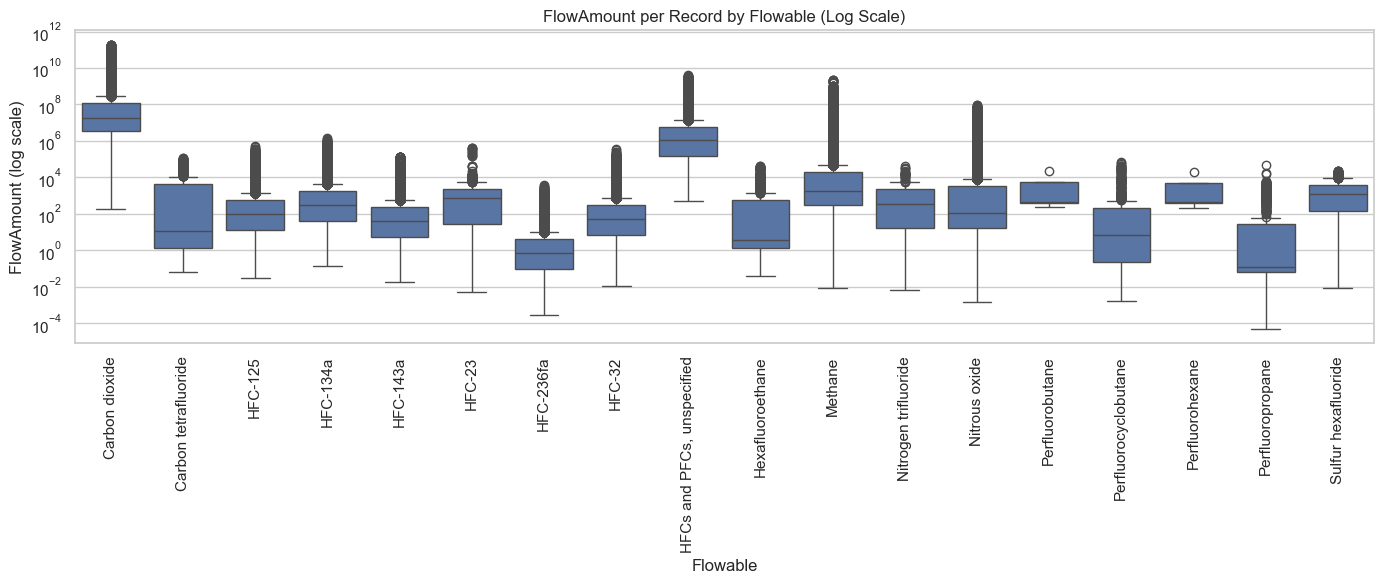

In [87]:
plt.figure(figsize=(14, 6))

sns.boxplot(data=ghg_df, x='Flowable', y='FlowAmount')


plt.yscale('log')  
plt.xticks(rotation=90)
plt.title("FlowAmount per Record by Flowable (Log Scale)")
plt.ylabel("FlowAmount (log scale)")
plt.xlabel("Flowable")
plt.tight_layout()
plt.show()

Above, the boxplot shows that carbon dioxide has the highest as well as widest range of emissions per record with a median higher than all other gases. Furthermore, carbon dioxide has extreme outliers of over $10^{11}$ kg in emissions per record. Gases like methane, nitrous oxide, and HFCs and PFCs, unspecified also show wide distributions with outliers that have high emissions amounts, while other gases like HFC-236fa, Perfluorobutane, and Perfluorohexane have low emissions and smaller interquartile ranges.

The total amount of `FlowAmount` emissions per `Flowable` gas could be analyzed via bar chart:

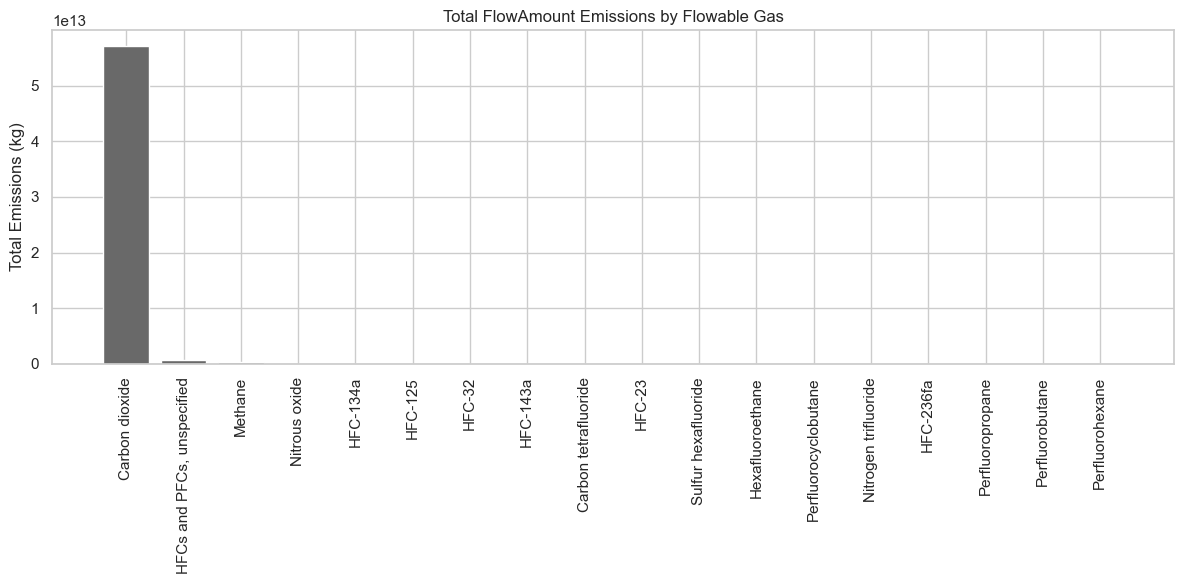

In [89]:
total_emissions_by_gas = ghg_df.groupby('Flowable')['FlowAmount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(total_emissions_by_gas['Flowable'], total_emissions_by_gas['FlowAmount'], color='dimGray')
plt.xticks(rotation=90)
plt.ylabel("Total Emissions (kg)")
plt.title("Total FlowAmount Emissions by Flowable Gas")
plt.tight_layout()
plt.show()

From above, carbon dioxide clearly overwhelmingly dominates total emissions with other gases such as methane, nitrous oxide, and various HFCs and PFCs contributing much smaller amounts in comparison.

**SectorName**: 

SectorName is a categorical variable representing the economic or industrial sector that is reponsible for greenhouse gas emissions in each record. Proportions of `SectorName` records can be viewed through the `value_counts()` function:

In [94]:
pd.set_option('display.max_rows', None)  
ghg_df['SectorName'].value_counts(normalize=True)
pd.reset_option('display.max_rows')    

**State:**

**Year:**

**D. Multiple Variable Exploration**